# For Kaggle

In [1]:
# !pip install transformers==4.49.0 accelerate==1.4.0 bitsandbytes==0.45.2

In [2]:
# import transformers
# print(transformers.__version__)

In [ ]:
!pip install together

In [4]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("HF_TOKEN")
secret_value_1 = user_secrets.get_secret("TOGETHER_API_KEY")

# Local

In [12]:
import json

with open("config.json", "r") as f:
    secret_value_1 = json.load(f)["TOGETHER_API_KEY"]

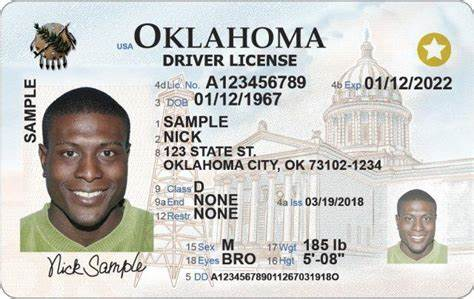

In [23]:
from IPython.display import Image, display, Markdown

# Provide the path to your image file
# imageUrl = "/kaggle/input/d/prem1503/llama-ocr-testing/idcard.jpg"
imageUrl = "./images/idcard.jpg"
display(Image(imageUrl))

In [33]:
labels = [
    "Name",
    "Address",
    "Sex",
    "Date of Birth",
]
#The system message (prompt) sets the assistant's behavior by defining its desired persona and task. We also delineate the specific set of entity labels we aim to identify.

def system_message(labels):
    return f"""
You are an expert in Natural Language Processing. Your task is to identify common Named Entities (NER) in a given Image.
The possible common Named Entities (NER) types are exclusively: ({", ".join(labels)}). If these Named Entities are not found return their value as 'NOT FOUND' """

In [34]:
from together import Together
import base64

client = Together(api_key=secret_value_1)
# getDescriptionPrompt = "You are a UX/UI designer. Describe the attached screenshot or UI mockup in detail. I will feed in the output you give me to a coding model that will attempt to recreate this mockup, so please think step by step and describe the UI in detail. Pay close attention to background color, text color, font size, font family, padding, margin, border, etc. Match the colors and sizes exactly. Make sure to mention every part of the screenshot including any headers, footers, etc. Use the exact text from the screenshot."

getDescriptionPrompt = """You are an amazing AI assistant who can extract text from an image. 
    So extract only the text from the image and give me the following named entities. Name and address and the output should be in JSON format"""

def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(imageUrl)

In [39]:
messages = [
          {"role": "system", "content": system_message(labels=labels)},
          {"role": "user", "content": [
                # {"type": "text", "text": getDescriptionPrompt},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ]
        }
      ]

response = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=messages,
    stream=False,
)

In [40]:
Markdown(response.choices[0].message.content)

The "Name" entity is present in the image, it is labeled as Nick Sample.

The "Address" entity is present in the image, it is labeled as 123 State St. Oklahoma City, OK 73102-1234.

The "Sex" entity is present in the image, it is labeled as M.

The "Date of Birth" entity is present in the image, it is labeled as 01/12/1967.

# Pan Card

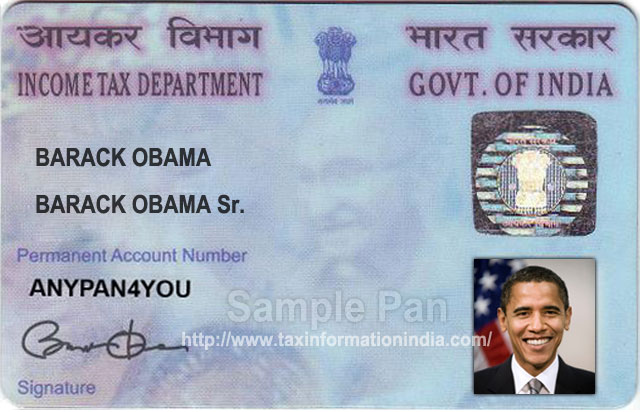

In [52]:
# imageUrl = "/kaggle/input/d/prem1503/llama-ocr-testing/bill.jpeg"
imageUrl1 = "images/PAN_Card_Sample.jpg"
display(Image(imageUrl1, width=400))

In [51]:
base64_image = encode_image(imageUrl1)

stream = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
        {
            "role": "system", 
            "content": "You are amazing Natural Lamguage Procesing and Image analyzing agent. Some of your special powers are text extract (Object Character Recognition) and Named Entities Recognition"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text": """Describe the Image. Also Perform an Named Entity Recognition on it"""},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    stream=False,
)

Markdown(stream.choices[0].message.content)

The image shows a sample Permanent Account Number (PAN) card for Barack Obama, the 44th President of the United States. The card is issued by the Income Tax Department of the Government of India and features the following information:

* **Name:** Barack Obama
* **Title:** Barack Obama Sr.
* **PAN Number:** ANYPAN4YOU
* **Signature:** Barack Obama's signature

The card also includes:

* **Photo:** A photo of Barack Obama
* **Country:** Government of India
* **Department:** Income Tax Department

**Named Entities Recognition:**

The named entities recognized in the image are:

* **Barack Obama**: The 44th President of the United States
* **Government of India**: The issuing authority of the PAN card
* **Income Tax Department**: The department responsible for issuing the PAN card

Overall, the image appears to be a sample PAN card issued to Barack Obama, demonstrating the process of obtaining a PAN card in India.

# Adhaar Card

In [57]:
# imageUrl = "/kaggle/input/d/prem1503/llama-ocr-testing/bill.jpeg"
imageUrl2 = "images/sample_aadhaar.jpg"
# display(Image(imageUrl2, width=400))

In [61]:
base64_image = encode_image(imageUrl2)

stream = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
        {
            "role": "system", 
            "content": "You are amazing Natural Lamguage Procesing and Image analyzing agent. Some of your special powers are text extract (Object Character Recognition) and Named Entities Recognition"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text": """Describe the Image. Also Perform an Named Entities Recognition (NER) on the Image and return the Named Entities and their values"""},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    stream=False,
)

Markdown(stream.choices[0].message.content)

The image shows a Government of India ID card, which appears to be in Tamil. The card has a photo of a woman with dark hair pulled back, wearing a green top. The top-left corner features an emblem, and the top-right corner has a QR code.

The card contains the following information:

* Government of India logo
* Name: Aishwarya G
* Date of Birth: 17/11/1999
* Gender: Female
* ID number: 3052 7875 6145

The card also includes a message in Tamil at the bottom, which translates to "Aadhaar - Saatharane Manithanin Athikaram" (Aadhaar - Right to Identity). The background of the image is a plain white surface.

**Named Entities Recognition (NER) Result:**

| Entity | Type | Value |
| --- | --- | --- |
| Government of India | Organization | Government of India |
| Aishwarya G | Person | Aishwarya G |
| 17/11/1999 | Date | 17/11/1999 |
| Female | Gender | Female |
| 3052 7875 6145 | ID Number | 3052 7875 6145 |
| Aadhaar | System | Aadhaar |
| Right to Identity | Concept | Right to Identity |

The NER result shows that the named entities present in the image are Government of India, Aishwarya G, 17/11/1999, Female, 3052 7875 6145, Aadhaar, and Right to Identity. The entities are classified as Organization, Person, Date, Gender, ID Number, System, and Concept, respectively.

# Passport

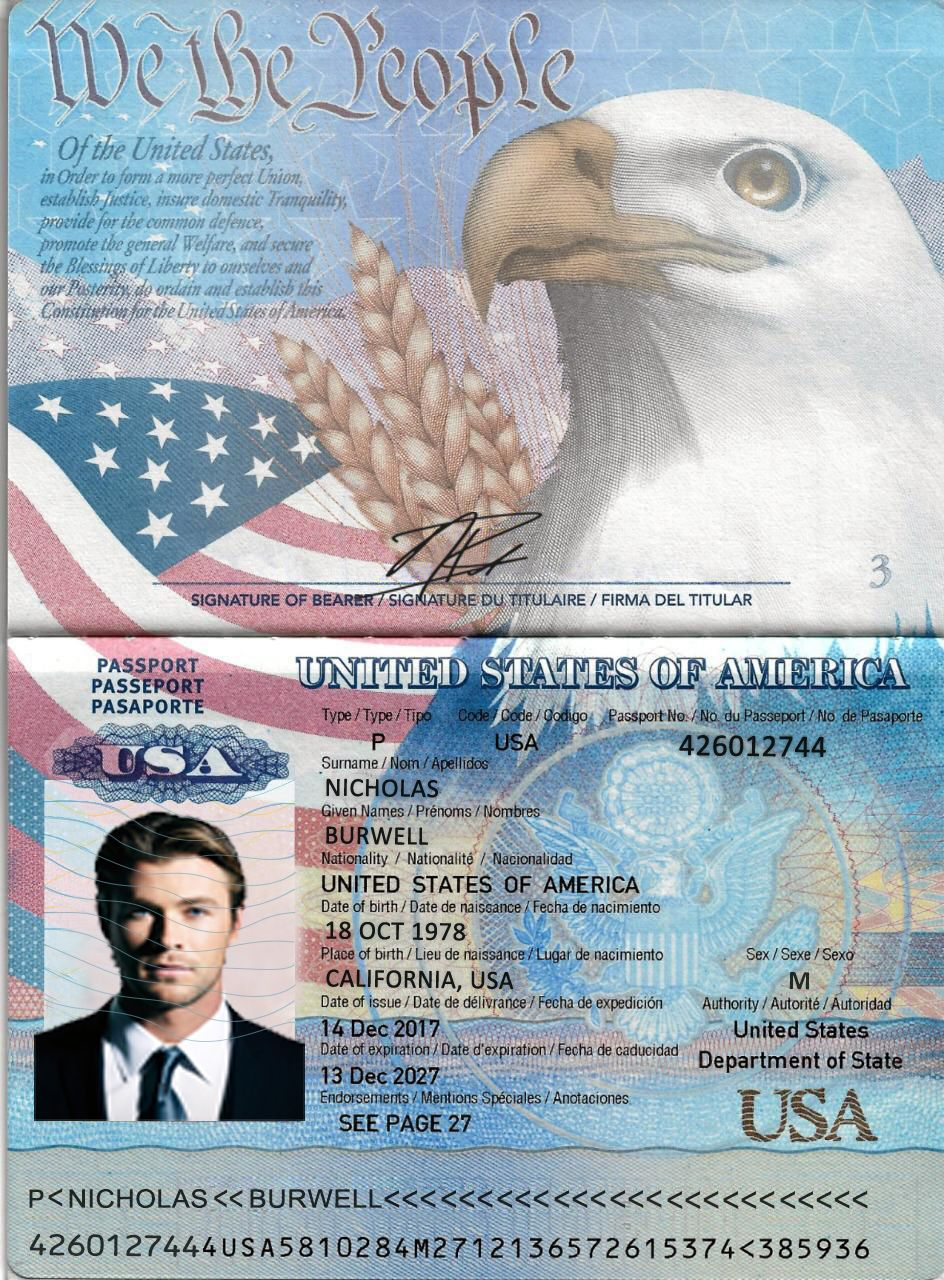

In [63]:
# imageUrl = "/kaggle/input/d/prem1503/llama-ocr-testing/bill.jpeg"
imageUrl3 = "images/sample_usa_passport.jpg"
display(Image(imageUrl3, width=400))

In [65]:
base64_image = encode_image(imageUrl3)

stream = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
        {
            "role": "system", 
            "content": "You are amazing Natural Lamguage Procesing and Image analyzing agent. Some of your special powers are text extract (Object Character Recognition) and Named Entities Recognition"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text": """Describe the Image. Also Perform an Named Entities Recognition (NER) on the Image and return the Named Entities and their values"""},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    stream=False,
)

Markdown(stream.choices[0].message.content)

The image shows a United States passport, which is a travel document issued by the U.S. government to its citizens. The passport is a blue and white card with a picture of an eagle on it, and it contains information about the holder's identity, including their name, date of birth, place of birth, and nationality.

Here are the details of the passport:

* **Name:** Nicholas Burwell
* **Surname:** Burwell
* **Given Names:** Nicholas
* **Nationality:** Nationality: Nationalité: Nacionalidad
* **Date of birth:** 18 Oct 1978
* **Place of birth:** California, USA
* **Sex:** M
* **Authority:** United States Department of State
* **Date of issue:** 14 Dec 2017
* **Date of expiration:** 13 Dec 2027

The passport also has a photo of the holder, which is a headshot of a man in a suit and tie. There are several lines of text on the passport, including the holder's name, date of birth, place of birth, and nationality. The background of the passport is blue and white, with a pattern of stars and stripes.

Overall, the passport appears to be a valid and authentic document issued by the U.S. government. It contains all the necessary information about the holder's identity and citizenship, and it has a photo of the holder to verify their identity.

**Named Entities Recognition (NER) Results:**

* **Name:** Nicholas Burwell
* **Surname:** Burwell
* **Nationality:** Nationality
* **Date of birth:** 18 Oct 1978
* **Place of birth:** California, USA
* **Sex:** M
* **Authority:** United States Department of State
* **Date of issue:** 14 Dec 2017
* **Date of expiration:** 13 Dec 2027

These are the named entities that were recognized in the image, along with their corresponding values.

# Indian Passport

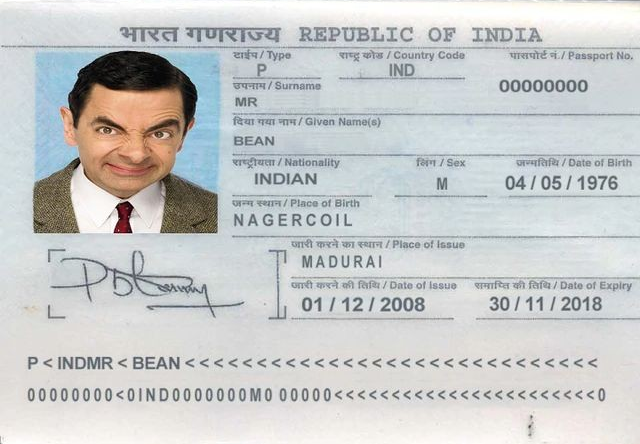

In [69]:
# imageUrl = "/kaggle/input/d/prem1503/llama-ocr-testing/bill.jpeg"
imageUrl4 = "images/sample_ind_passport.png"
display(Image(imageUrl4, width=400))

In [71]:
base64_image = encode_image(imageUrl4)

stream = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
        {
            "role": "system", 
            "content": "You are amazing Natural Lamguage Procesing and Image analyzing agent. Some of your special powers are text extract (Object Character Recognition) and Named Entities Recognition"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text": """Describe the Image. Also Perform an Named Entities Recognition (NER) on the Image and return the Named Entities and their values"""},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    stream=False,
)

Markdown(stream.choices[0].message.content)

The image shows a passport belonging to Mr. Bean, an Indian citizen. The passport is light blue and has a photo of Mr. Bean on the left side. The top of the passport reads "REPUBLIC OF INDIA" in English and "भारत गणराज्य" in Hindi. Below this, there is a section with the following information:

* **Name:** MR BEAN
* **Nationality:** INDIAN
* **Sex:** M
* **Date of Birth:** 04/05/1976
* **Place of Birth:** NAGERCOIL
* **Place of Issue:** MADURAI

The bottom of the passport has a section with the following information:

* **Date of Issue:** 01/12/2008
* **Date of Expiry:** 30/11/2018

The passport also has a signature and a series of numbers at the bottom.

**Named Entities Recognition (NER)**

Based on the image, the following named entities and their values can be recognized:

* **Person:**
	+ Mr. Bean
* **Nationality:**
	+ Indian
* **Gender:**
	+ Male
* **Date of Birth:**
	+ 04/05/1976
* **Place of Birth:**
	+ Nagercoil
* **Place of Issue:**
	+ Madurai
* **Date of Issue:**
	+ 01/12/2008
* **Date of Expiry:**
	+ 30/11/2018

# Text conversions

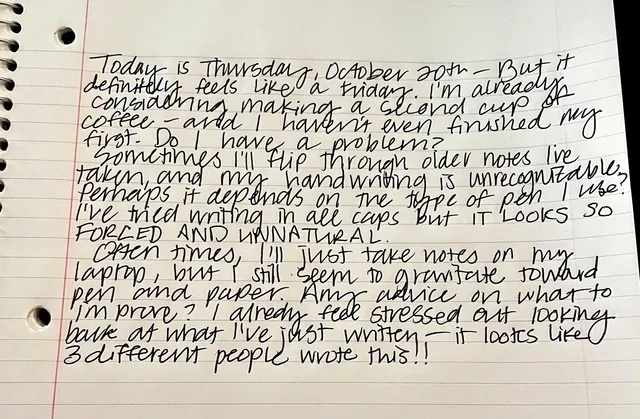

In [ ]:
# imageUrl = "/kaggle/input/d/prem1503/llama-ocr-testing/bill.jpeg"
imageUrl5 = "images/handwritten-documents.webp"
display(Image(imageUrl5, width=400))

In [ ]:
base64_image = encode_image(imageUrl5)

stream = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=[
        {
            "role": "system", 
            "content": "You are amazing Natural Lamguage Procesing and Image analyzing agent. Some of your special powers are text extract (Object Character Recognition) and Named Entities Recognition"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text": """Extract all the text from the image"""},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    stream=False,
)

Markdown(stream.choices[0].message.content)

Today is Thursday, October 20th - But it definitely feels like a Friday. I'm already considering making a second cup of coffee - and I haven't even finished my first. Do I have a problem? Sometimes I'll flip through older notes I've taken, and my handwriting is unrecognizable, perhaps it depends on the type of pen I use? I've tried writing in all cups but it looks so FORCED AND UNNATURAL. Caten times, I'll just take notes on my laptop, but I still seem to gravitate toward pen and paper. Any advice on what to improve? I already feel stressed out looking back at what I've just written - it looks like 3 different people wrote this!!

In [26]:
from together import Together
client = Together(api_key=secret_value_1)
messages = [
    {
            "role": "user",
            "content" : [{
                "type":"text",
                "text": "what is calculus?"
            }]
    }
]
response = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=messages
)


In [27]:
response_text = response.choices[0].message.content
response_text

'Calculus is a branch of mathematics that deals with the study of continuous change, particularly in the context of functions and limits. It is a fundamental subject that has numerous applications in various fields, including physics, engineering, economics, and computer science.\n\n**What does calculus involve?**\n\nCalculus is divided into two main branches:\n\n1. **Differential Calculus**: This branch deals with the study of rates of change and slopes of curves. It involves the concept of limits, derivatives, and differentials, which are used to analyze how functions change as their input changes.\n2. **Integral Calculus**: This branch deals with the study of accumulation of quantities, such as area and volume. It involves the concept of integrals, which are used to calculate the total amount of change of a function over a given interval.\n\n**Key concepts in calculus**\n\nSome of the key concepts in calculus include:\n\n* **Limits**: The concept of limits is used to define the beha

In [28]:
messages1 = messages.copy()
messages.append(
    {
        "role": "assistant",
        "content" : response_text
    }
)
messages.append(
    {
        "role": "user",
        "content" : [
            {
                "type": "text", 
                "text":"can you elaborate on the physics part from your above response"
            }
        ]
    }
)
messages

[{'role': 'user', 'content': [{'type': 'text', 'text': 'what is calculus?'}]},
 {'role': 'assistant',
  'content': 'Calculus is a branch of mathematics that deals with the study of continuous change, particularly in the context of functions and limits. It is a fundamental subject that has numerous applications in various fields, including physics, engineering, economics, and computer science.\n\n**What does calculus involve?**\n\nCalculus is divided into two main branches:\n\n1. **Differential Calculus**: This branch deals with the study of rates of change and slopes of curves. It involves the concept of limits, derivatives, and differentials, which are used to analyze how functions change as their input changes.\n2. **Integral Calculus**: This branch deals with the study of accumulation of quantities, such as area and volume. It involves the concept of integrals, which are used to calculate the total amount of change of a function over a given interval.\n\n**Key concepts in calculus**

In [29]:
response1 = client.chat.completions.create(
    model="meta-llama/Llama-Vision-Free",
    messages=messages
)

In [30]:
response_text1 = response1.choices[0].message.content
response_text1

"Let's dive deeper into the physics aspect of calculus.\n\n**Calculus in Physics: A Fundamental Tool**\n\nCalculus is a fundamental tool in physics, used to describe the behavior of physical systems, from the smallest subatomic particles to the entire universe. Calculus helps physicists model complex phenomena, make predictions, and understand the underlying laws of nature.\n\n**Applications of Calculus in Physics**\n\nSome of the key applications of calculus in physics include:\n\n1. **Motion and Kinematics**: Calculus is used to describe the motion of objects, including their position, velocity, and acceleration. The derivative of a function represents the rate of change of an object's position, while the integral represents the total distance traveled.\n2. **Work and Energy**: Calculus is used to calculate the work done by a force on an object, as well as the energy transferred between objects.\n3. **Momentum and Collisions**: Calculus is used to calculate the momentum of an object,

In [31]:
messages1

[{'role': 'user', 'content': [{'type': 'text', 'text': 'what is calculus?'}]}]